In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from itertools import product

sns.set()

In [2]:
df = pd.read_csv('D:\DSC\Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.rename(columns={'Annual Income (k$)': 'AnnualIncome'}, inplace=True)
df.rename(columns={'Spending Score (1-100)': 'SpendingScore'},inplace=True)
df

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.isnull().sum()

CustomerID       0
Gender           0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64

In [5]:
df.describe(include=['O'])

,Gender
count,200
unique,2
top,Female
freq,112


In [6]:
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


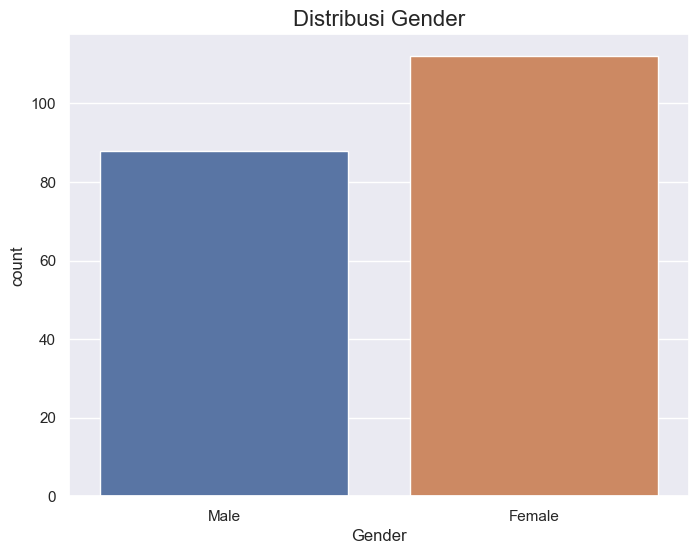

In [7]:
fig = plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender')
plt.title('Distribusi Gender', fontsize=16)
plt.show()

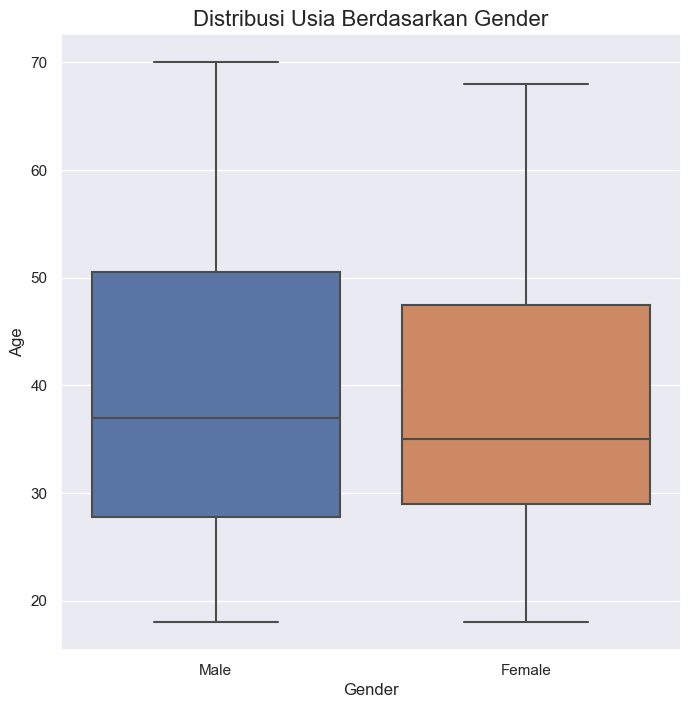

In [8]:
fig = plt.figure(figsize=(8, 8))
sns.boxplot(data=df, x='Gender', y='Age')
plt.title('Distribusi Usia Berdasarkan Gender', fontsize=16)
plt.show()

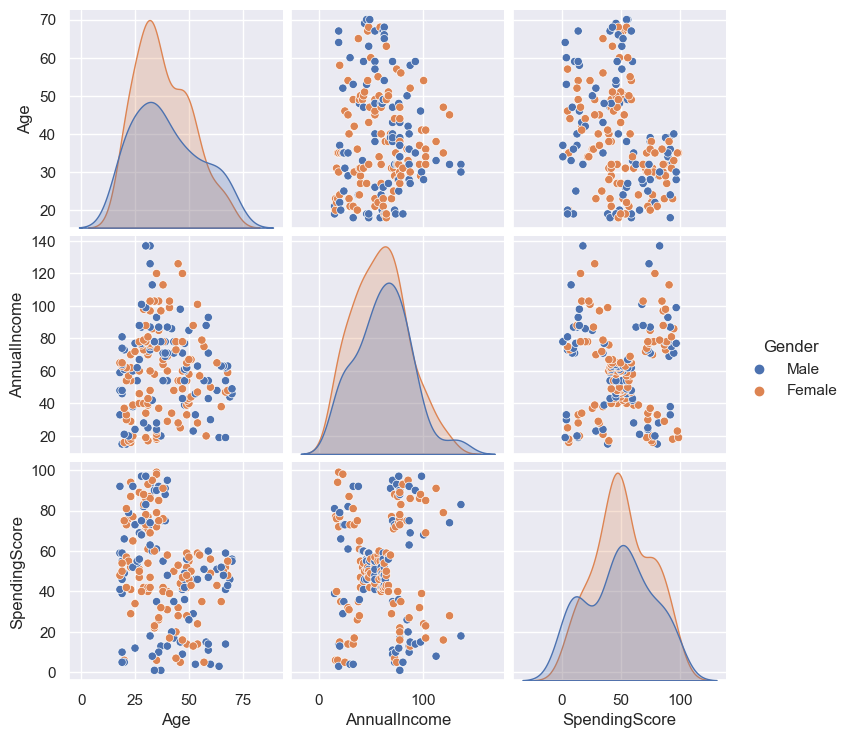

In [9]:
sns.pairplot(
data=df,
x_vars=['Age', 'AnnualIncome', 'SpendingScore'],
y_vars=['Age', 'AnnualIncome', 'SpendingScore'],
hue='Gender',
)
plt.show()

In [10]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

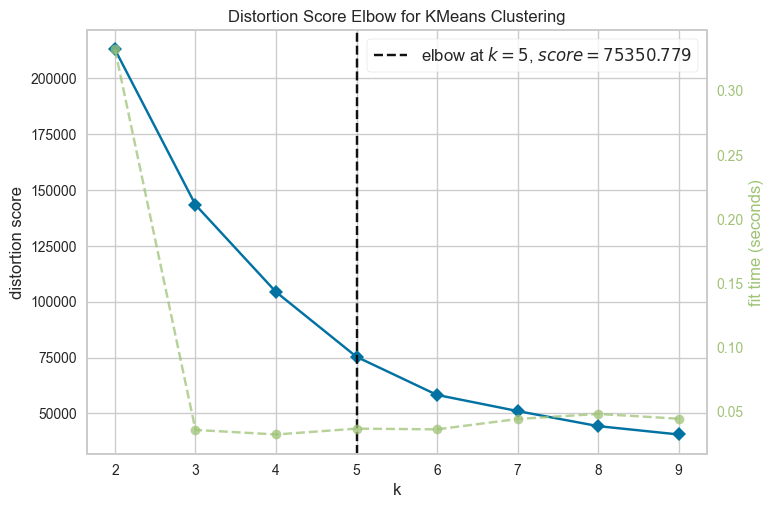

In [11]:
model = KMeans(random_state=1, n_init = 10)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(df[['Age', 'AnnualIncome', 'SpendingScore']])
visualizer.show()
plt.show()

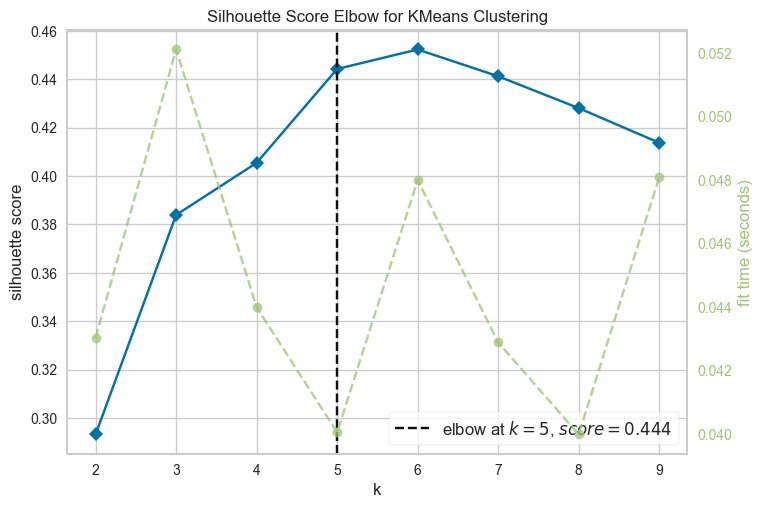

In [12]:
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')

visualizer.fit(df[['Age', 'AnnualIncome', 'SpendingScore']])
visualizer.show()
plt.show()

In [13]:
model = KMeans(n_clusters=5, random_state=1, n_init = 10)
model.fit(df[['Age', 'AnnualIncome', 'SpendingScore']])
df['cluster'] = model.labels_

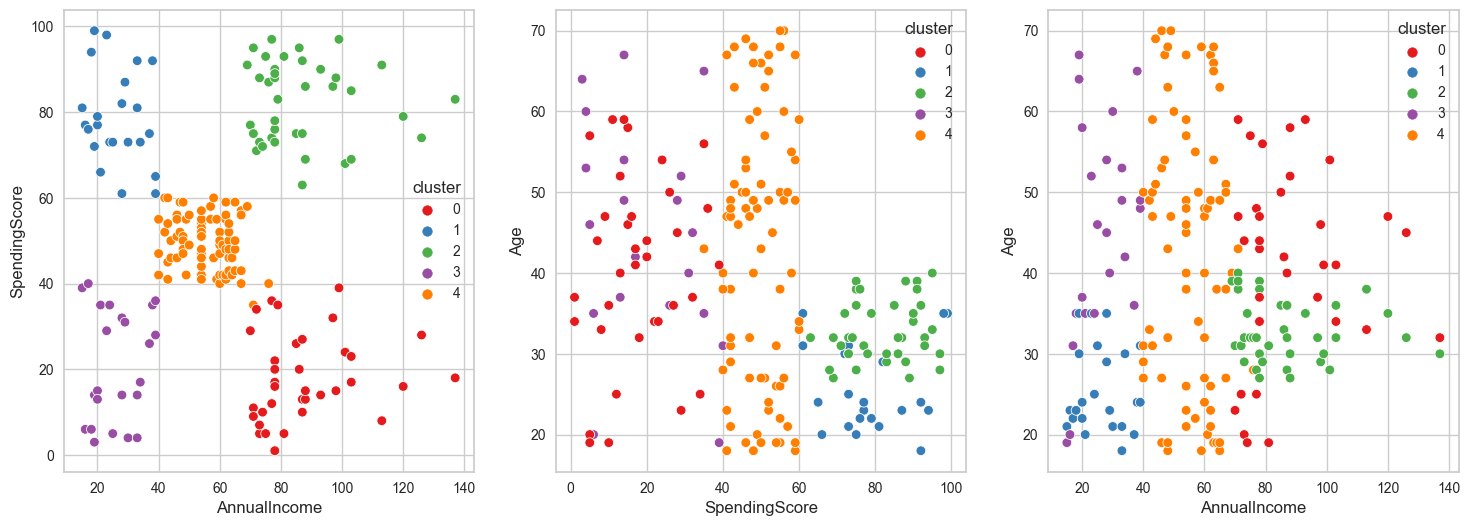

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
sns.scatterplot(data=df, x='AnnualIncome', y='SpendingScore', hue='cluster', palette='Set1', ax=ax[0])
sns.scatterplot(data=df, x='SpendingScore', y='Age', hue='cluster', palette='Set1', ax=ax[1])
sns.scatterplot(data=df, x='AnnualIncome', y='Age', hue='cluster', palette='Set1', ax=ax[2])

plt.show()

In [15]:
KM_clust_sizes = df.groupby('cluster').size().to_frame()
KM_clust_sizes.columns = ["KM_size"]
KM_clust_sizes

,KM_size
cluster,
0,36
1,23
2,39
3,23
4,79


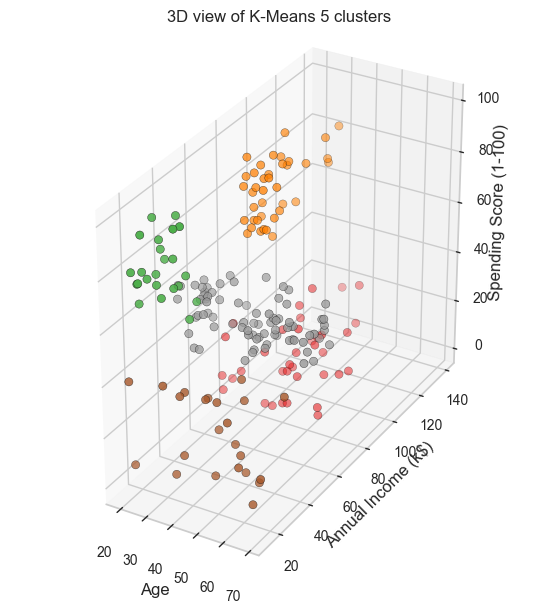

In [16]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Age'], df['AnnualIncome'], df['SpendingScore'], c=df['cluster'], s=35, edgecolor='k', cmap=plt.cm.Set1)

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('3D view of K-Means 5 clusters')

# Set the aspect ratio of the axes
ax.set_box_aspect((np.ptp(df['Age']), np.ptp(df['AnnualIncome']), np.ptp(df['SpendingScore'])))

plt.show()

In [17]:
import plotly as py
import plotly.graph_objs as go

def tracer(db, n, name):
    return go.Scatter3d(
        x = db[db['cluster']==n]['Age'],
        y = db[db['cluster']==n]['SpendingScore'],
        z = db[db['cluster']==n]['AnnualIncome'],
        mode = 'markers',
        name = name,
        marker = dict(
            size = 5
        )
     )

trace0 = tracer(df, 0, 'Cluster 0')
trace1 = tracer(df, 1, 'Cluster 1')
trace2 = tracer(df, 2, 'Cluster 2')
trace3 = tracer(df, 3, 'Cluster 3')
trace4 = tracer(df, 4, 'Cluster 4')

data = [trace0, trace1, trace2, trace3, trace4]

layout = go.Layout(
    title = 'Clusters by K-Means',
    scene = dict(
            xaxis = dict(title = 'Age'),
            yaxis = dict(title = 'Spending Score'),
            zaxis = dict(title = 'Annual Income')
        )
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

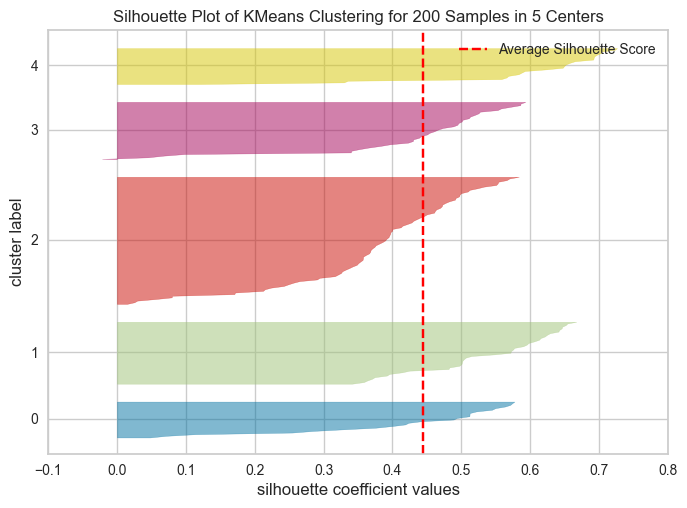

In [18]:
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(n_clusters=5, random_state=0, n_init=10)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(df[['Age', 'AnnualIncome', 'SpendingScore']])
visualizer.show()
plt.show()

In [19]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [22]:
eps_values = np.arange(8, 12.75, 0.25) 
min_samples = np.arange(3, 10)

parameters = list(product(eps_values, min_samples))

In [23]:
no_of_clusters = []
sil_score = []
for p in parameters:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(df[['Age','AnnualIncome', 'SpendingScore']])
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(df[['Age', 'AnnualIncome','SpendingScore']], DBS_clustering.labels_))

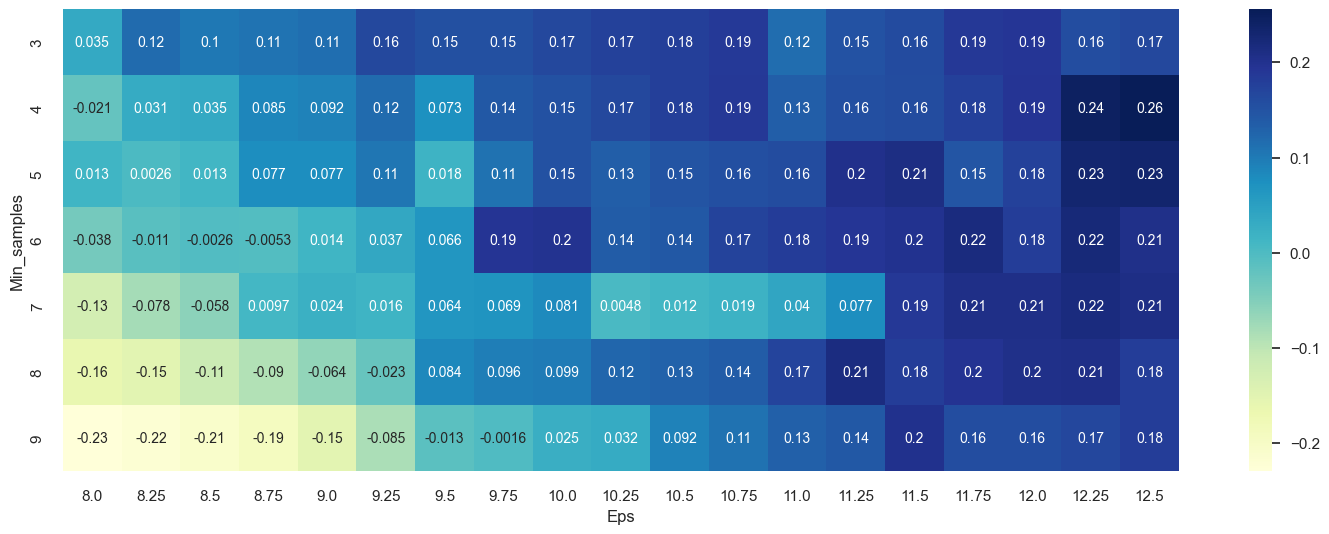

In [24]:
tmp = pd.DataFrame.from_records(parameters, columns =['Eps', 'Min_samples'])
tmp['Sil_score'] = sil_score
pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples',columns='Eps')
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [25]:
model = DBSCAN(eps=12.5, min_samples=4)
model.fit(df[['Age', 'AnnualIncome', 'SpendingScore']])
df['cluster_dbscan'] = DBS_clustering.labels_

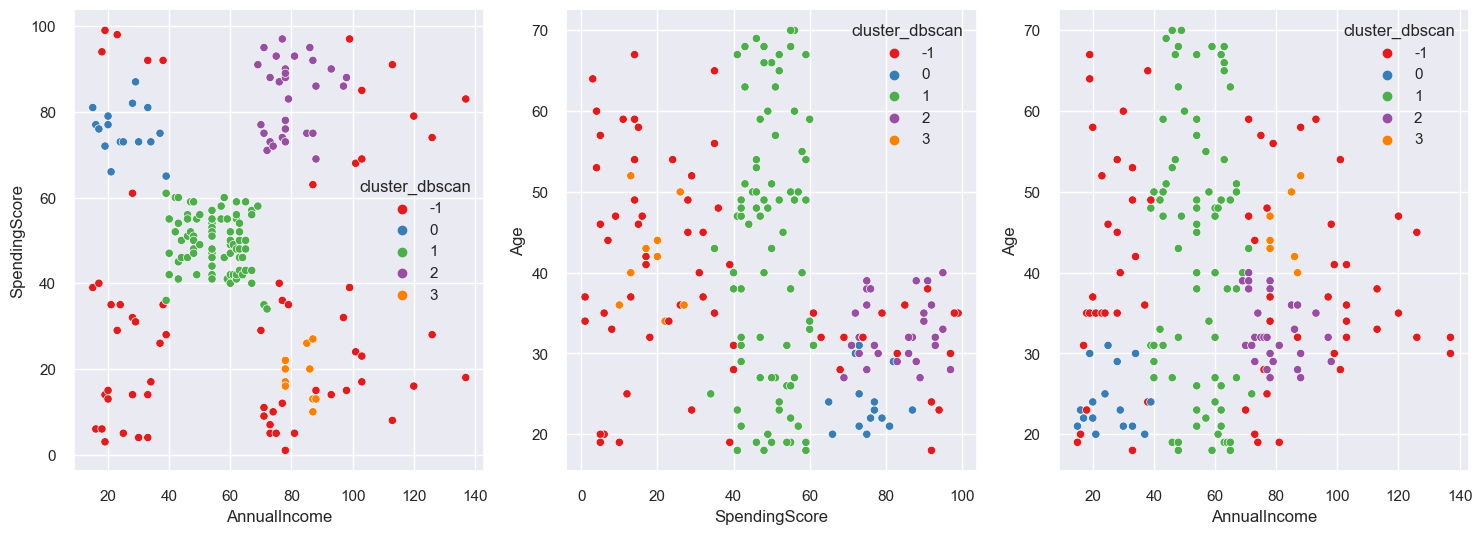

In [26]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
sns.scatterplot(data=df, x='AnnualIncome', y='SpendingScore',hue='cluster_dbscan', palette='Set1', ax=ax[0])
sns.scatterplot(data=df, x='SpendingScore', y='Age',hue='cluster_dbscan', palette='Set1', ax=ax[1])
sns.scatterplot(data=df, x='AnnualIncome', y='Age', hue='cluster_dbscan',palette='Set1', ax=ax[2])
plt.show()

In [27]:
from sklearn.cluster import AffinityPropagation

In [28]:
import warnings
warnings.filterwarnings('ignore')

no_of_clusters = []
preferences = range(-20000,-5000,100)
af_sil_score = []
for p in preferences:
    AF = AffinityPropagation(preference=p, max_iter=200).fit(df[['Age','AnnualIncome', 'SpendingScore']])
    no_of_clusters.append((len(np.unique(AF.labels_))))
    af_sil_score.append(silhouette_score(df[['Age', 'AnnualIncome','SpendingScore']], AF.labels_))
    af_results = pd.DataFrame([preferences, no_of_clusters, af_sil_score], index=['preference','clusters', 'sil_score']).T
    
af_results.sort_values(by='sil_score', ascending=False).head()

,preference,clusters,sil_score
82,-11800.0,6.0,0.451649
27,-17300.0,6.0,0.451491
51,-14900.0,6.0,0.451491
52,-14800.0,6.0,0.451440
28,-17200.0,6.0,0.451440


In [29]:
model = AffinityPropagation(preference=-11800)
model.fit(df[['Age', 'AnnualIncome', 'SpendingScore']])
df['cluster_affinity'] = model.labels_

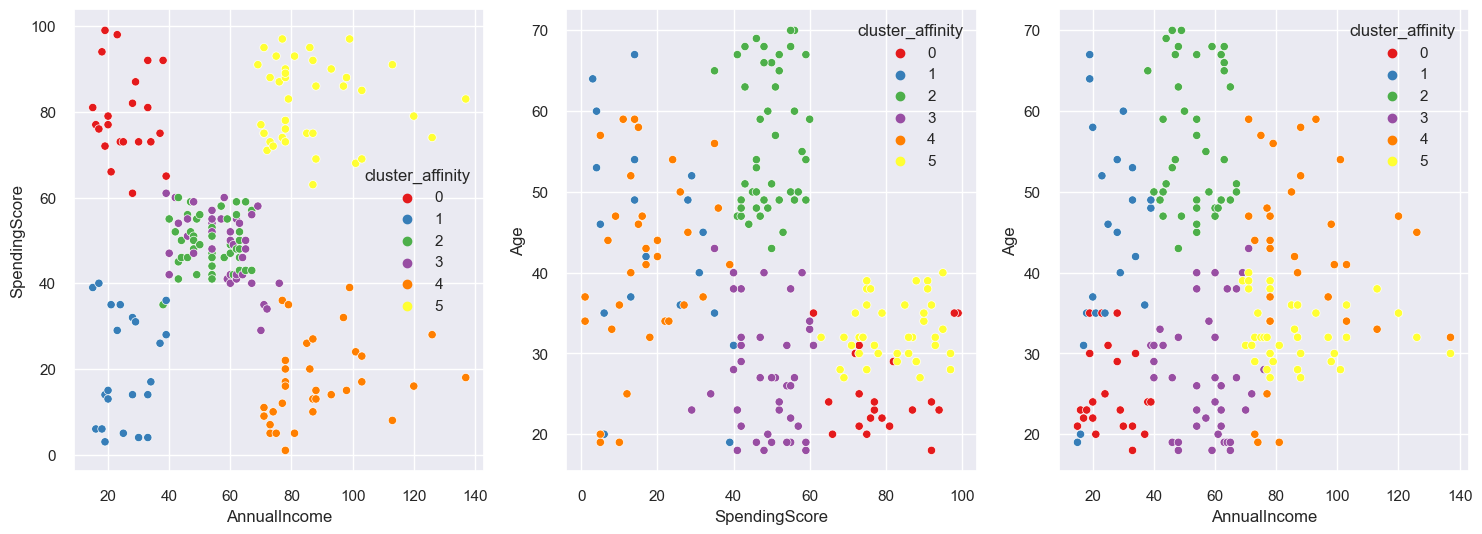

In [30]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
sns.scatterplot(data=df, x='AnnualIncome', y='SpendingScore', hue='cluster_affinity', palette='Set1', ax=ax[0])
sns.scatterplot(data=df, x='SpendingScore', y='Age', hue='cluster_affinity', palette='Set1', ax=ax[1])
sns.scatterplot(data=df, x='AnnualIncome', y='Age', hue='cluster_affinity', palette='Set1', ax=ax[2])
plt.show()

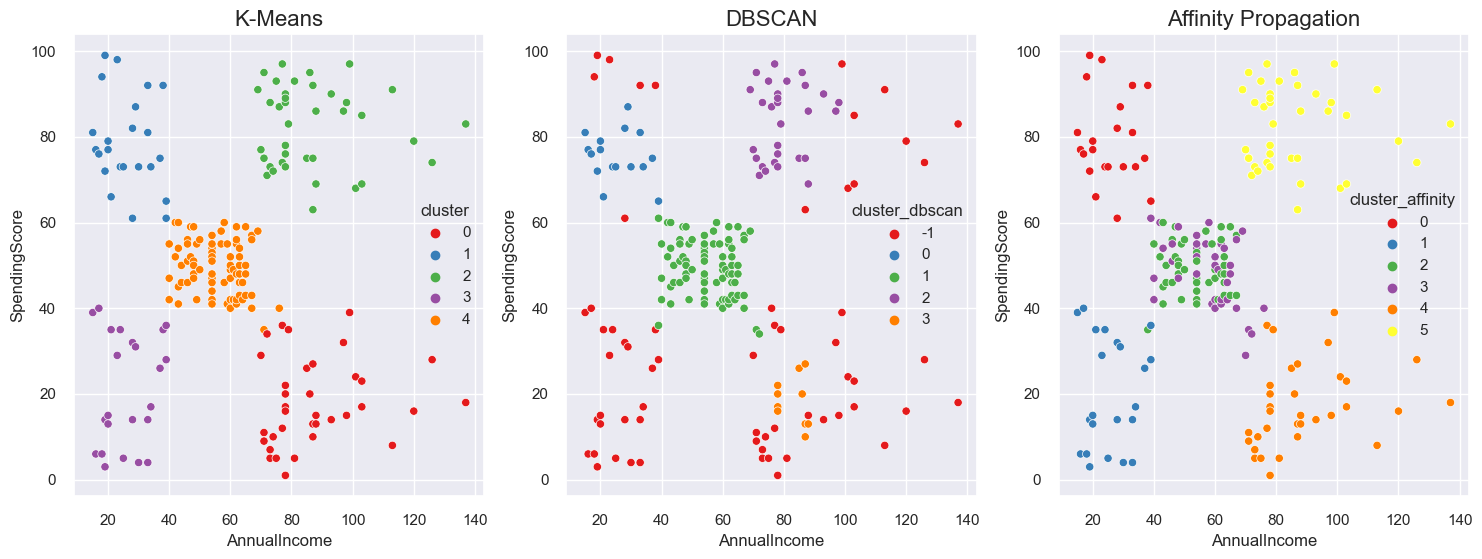

In [32]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
sns.scatterplot(data=df, x='AnnualIncome', y='SpendingScore', hue='cluster', palette='Set1', ax=ax[0])
sns.scatterplot(data=df, x='AnnualIncome', y='SpendingScore', hue='cluster_dbscan', palette='Set1', ax=ax[1])
sns.scatterplot(data=df, x='AnnualIncome', y='SpendingScore', hue='cluster_affinity', palette='Set1', ax=ax[2])
ax[0].set_title('K-Means', fontsize=16)
ax[1].set_title('DBSCAN', fontsize=16)
ax[2].set_title('Affinity Propagation', fontsize=16)
plt.show()